Caracterização meteorológica da área de estudo

Nesta atividade caracterizaremos a meteorologia da área de estudo. Avaliaremos os seguintes pontos:

1. Meteorologia de superfície
2. Meteorologia upperair ou sondagem/perfil da atmosfera
3. Superfície - Albedo, razão de Bowen e Rugosidade \
   
Meteorologia de superfície \

Analisaremos os dados de metar (estação meteorológica em aeroportos). Os dados serão coletados na plataforma https://hoinaski.prof.ufsc.br/BRAIN/getMETAR .


In [1]:
# Selecionar arquivo para análise
import os

# Pegando o caminho do diretório atual
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
metSuperficiePath = os.path.join(rootPath, 'inputs', 'meteoSuperficie')
print(metSuperficiePath)

# Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath)
print(files)


D:\ENS5173_01
D:\ENS5173_01\inputs\meteoSuperficie
['metar_2021.csv', 'metar_2022.csv', 'metar_2023.csv']


In [13]:
# Abrindo os arquivos metar
import pandas as pd

# Abrindo cada arquivo dentro da pasta e acumulando em uma lista chamada de metSuperficie
metSuperficie=[]
for file in files:
    metSuperficie.append(pd.read_csv(metSuperficiePath+'\\'+file))

# Convertendo metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie)

print(metSuperficie)
print(type(metSuperficie))

      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2021     0 NaN  190.0  3.601108   914.4  6.0  6.0   
1       1      1  2021     1 NaN  190.0  4.115552   914.4  6.0  6.0   
2       1      1  2021     2 NaN  180.0  5.658884   914.4  6.0  6.0   
3       1      1  2021     3 NaN  190.0  4.115552   914.4  6.0  6.0   
4       1      1  2021     4 NaN  190.0  4.629996   914.4  3.0  3.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
8753   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0  6.0   
8754   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0  6.0   
8755   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0  6.0   
8756   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0  6.0   
8757   31     12  2023    23 NaN  140.0  2.057776  2438.4  6.0  6.0   

                p  temp  dpTemp  vis   pw   relh  
0     1009.665616  23.0    21.0  NaN  0.0  88.51  
1     1009.662022  23.0    20.0  NaN  0.0  83

In [27]:
# Criar uma coluna com Datetime dos dados

# Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])
print(metSuperficie['datetime'])

# Definido a coluna de datetime como índice da matriz
metSuperficie.set_index(metSuperficie['datetime'])

datetime
2021-01-01 00:00:00   2021-01-01 00:00:00
2021-01-01 01:00:00   2021-01-01 01:00:00
2021-01-01 02:00:00   2021-01-01 02:00:00
2021-01-01 03:00:00   2021-01-01 03:00:00
2021-01-01 04:00:00   2021-01-01 04:00:00
                              ...        
2023-12-31 19:00:00   2023-12-31 19:00:00
2023-12-31 20:00:00   2023-12-31 20:00:00
2023-12-31 21:00:00   2023-12-31 21:00:00
2023-12-31 22:00:00   2023-12-31 22:00:00
2023-12-31 23:00:00   2023-12-31 23:00:00
Name: datetime, Length: 17518, dtype: datetime64[ns]


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,datetime
datetime,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,1,1,2021,0,NaN,190.0,3.601108,914.4,6.0,6.0,1009.665616,23.0,21.0,NaN,0.0,88.51,2021-01-01 00:00:00
2021-01-01 01:00:00,1,1,2021,1,NaN,190.0,4.115552,914.4,6.0,6.0,1009.662022,23.0,20.0,NaN,0.0,83.21,2021-01-01 01:00:00
2021-01-01 02:00:00,1,1,2021,2,NaN,180.0,5.658884,914.4,6.0,6.0,1009.662022,22.0,20.0,NaN,0.0,88.43,2021-01-01 02:00:00
2021-01-01 03:00:00,1,1,2021,3,NaN,190.0,4.115552,914.4,6.0,6.0,1009.662022,22.0,20.0,NaN,0.0,88.43,2021-01-01 03:00:00
2021-01-01 04:00:00,1,1,2021,4,NaN,190.0,4.629996,914.4,3.0,3.0,1009.662022,22.0,19.0,NaN,0.0,83.09,2021-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,31,12,2023,19,NaN,110.0,4.629996,2438.4,6.0,6.0,1009.651241,25.0,18.0,NaN,0.0,65.12,2023-12-31 19:00:00
2023-12-31 20:00:00,31,12,2023,20,NaN,130.0,3.601108,2438.4,6.0,6.0,1009.651241,24.0,18.0,NaN,0.0,69.14,2023-12-31 20:00:00
2023-12-31 21:00:00,31,12,2023,21,NaN,120.0,2.057776,2438.4,6.0,6.0,1009.654835,24.0,18.0,NaN,0.0,69.14,2023-12-31 21:00:00


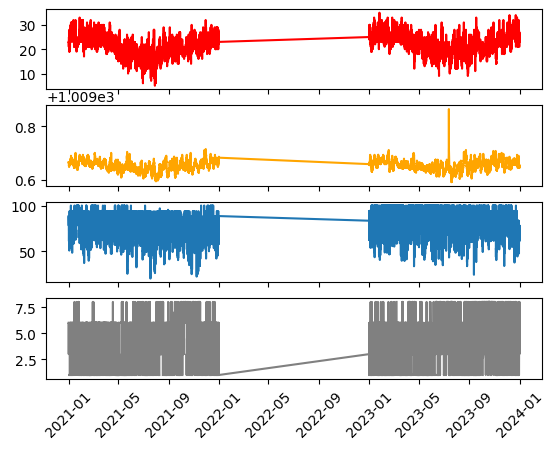

In [28]:
# Analisando os dados através de figuras
# Criar uma coluna com Datetime dos dados
import pandas as pd

# Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])

# Definir a coluna de datetime como índice do DataFrame
metSuperficie.set_index('datetime', inplace=True)

# Analisar os dados através de figuras
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, sharex=True)
ax[0].plot(metSuperficie.index, metSuperficie['temp'], color='red')
ax[1].plot(metSuperficie.index, metSuperficie['p'], color='orange')
ax[2].plot(metSuperficie.index, metSuperficie['relh'])
ax[3].plot(metSuperficie.index, metSuperficie['cco'], color='gray')
ax[3].tick_params(axis='x', rotation=45)
plt.show()


In [22]:
# Estatísticas dos dados
import pandas as pd

# Definir 'datetime' como o índice do DataFrame
metSuperficie.set_index('datetime', inplace=True)

# Calcular a média mensal dos dados
media_mensal = metSuperficie.resample('M').mean()
media_mensal = metSuperficie.resample('ME').mean()

# Exibir as estatísticas
print(media_mensal)


                  day  month    year       hour  ct          wd        ws  \
datetime                                                                    
2021-01-31  16.000000    1.0  2021.0  11.500000 NaN  214.774965  3.575005   
2021-02-28  14.500000    2.0  2021.0  11.500000 NaN  197.668222  3.371675   
2021-03-31  15.975741    3.0  2021.0  11.513477 NaN  224.959212  3.361566   
2021-04-30  15.500000    4.0  2021.0  11.500000 NaN  202.069544  3.382410   
2021-05-31  16.000000    5.0  2021.0  11.500000 NaN  230.860097  3.062866   
2021-06-30  15.500000    6.0  2021.0  11.500000 NaN  223.320988  3.332454   
2021-07-31  16.000000    7.0  2021.0  11.500000 NaN  246.718310  3.184159   
2021-08-31  16.000000    8.0  2021.0  11.500000 NaN  230.422406  3.678955   
2021-09-30  15.500000    9.0  2021.0  11.500000 NaN  231.086331  4.086376   
2021-10-31  16.343490   10.0  2021.0  11.515235 NaN  197.640862  4.067635   
2021-11-30  15.500000   11.0  2021.0  11.500000 NaN  200.488045  4.130533   

C:\Users\PC\AppData\Local\Temp\ipykernel_8428\1666593399.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = metSuperficie.resample('M').mean()
